#**Introduction to Artificial Intelligence iRobot Assignment 2 Convoluntional Neural Network**

#**Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, classification_report

#**Data Path and Image Processing**

In [ ]:
#Image Pre-processing
#variables

#defines the image height, width and channel 
img_height, img_width, img_ch = 256, 256, 3

#defines the batch size 
batch_size =100

#epochs - number of loops thru training set
epochs=2

#file path from directory
dir_tr ='/content/drive/MyDrive/AI_Assignment_2/Data/train'
dir_test ='/content/drive/MyDrive/AI_Assignment_2/Data/test'

#imagedatagenrator from tensorflow - real time augmentation of images (train)
train_datagen = ImageDataGenerator(
        #rescale the image sizes with ration 0 to 1 from 0 to 255
        rescale=1./255,
        #slant the images
        shear_range=0.2,
        #zoom the images
        zoom_range=0.2,
        #flip the image horizontally
        horizontal_flip=True)

#imagedatagenrator from tensorflow - real time augmentation of images (test)
test_datagen = ImageDataGenerator(rescale=1./255) #scale the images

#saving to a variable the loading of the image dataset in memory and creating batches 
#of augmented images from file path
train_generator = train_datagen.flow_from_directory(
        #the directory path of the training images
        dir_tr,
        #target size of what dimension the images are resized
        target_size=(img_height, img_width),
        #batch sie - number of images given in 1 iteration
        batch_size=batch_size,
        #mode of label array - binary means 1d arrary labels  
        class_mode='binary')

#saving to a variable the loading of the image dataset in memory and creating batches 
#of augmented images from file path
test_generator = test_datagen.flow_from_directory(
        #the directory path of the test images
        dir_test,
        #target size of what dimension the images are resized
        target_size=(img_height, img_width),
        #batch sie - number of images given in 1 iteration
        batch_size=batch_size,
        #mode of label array - binary means 1d arrary labels
        class_mode='binary')

#puts into a variable the images followed by the labels with next to move next into the array
images, labels = next(train_generator)

#print out the labels - 0 means non recycable & 1 means recyclable
train_generator.class_indices

Found 12409 images belonging to 2 classes.
Found 3105 images belonging to 2 classes.


{'non-recyclable': 0, 'recyclable': 1}

#**Display Dataset**

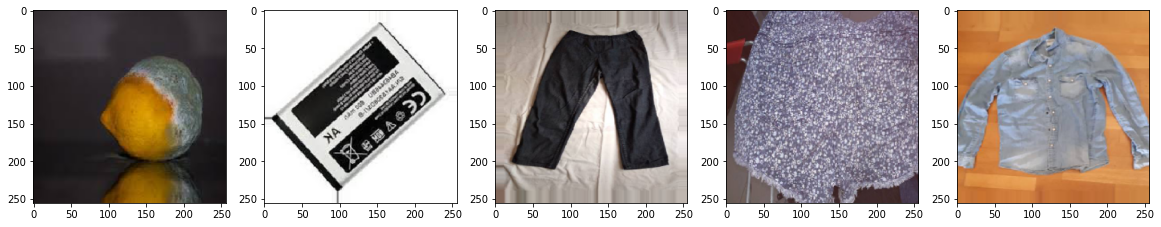

In [ ]:
#using matplotlib create a figure object
plt.figure(figsize=(20, 20))#configure the figure size to a width of 20 and height of 20

#display the image sets from the train data et
n = 5  #how any plots will be displayed
#using a forloop for the amount of plots
for i in range(n):
    # display original
    ax = plt.subplot(2,n, i + 1)
    #display the data as an image based on the forloop
    plt.imshow(images[i])
    #show the axis 
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

plt.show()

#**Building and Compiling Model**

In [ ]:
#Code for the model and the layers

#sequantial model api -simplest and allows us to define the layers in a linear order from input to output 
model = Sequential()
#conv2D - neural networks create a feature map (convolutional layer)
model.add(Conv2D(64, (3, 3), padding='same', activation = 'relu', input_shape = (img_height, img_width, img_ch)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

#conv2D - neural networks create a feature map (convolutional layer)
model.add(Conv2D(64, (3, 3), activation='relu'))
#MaxPooling2D - selects the maximum element from the region of the feature map covered by the filter
model.add(MaxPooling2D(pool_size=(2, 2)))
#Dropout - drops some of the neruons
model.add(Dropout(0.4))

#conv2D - neural networks create a feature map (convolutional layer)
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# This layer flattens the resulting image array to 1D array
model.add(Flatten())

# Hidden layer with 64 neurons and Rectified Linear Unit activation function 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Output layer with single neuron using softmax
model.add(Activation('softmax'))

model.summary()
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 63, 63, 64)        0

#**Model Training**

In [ ]:
history = model.fit(train_generator,
                    validation_data = test_generator,
                    batch_size = 32,
                    epochs = 15,
                    verbose = 1)

Epoch 1/15
  9/125 [=>............................] - ETA: 50:02 - loss: 4.2372 - accuracy: 0.4300

In [ ]:
scores = model.evaluate(test_generator, verbose=1)

print("Accuracy: %.2f%%" % (scores[1]*100))

#**Model Evaluation Graphs**

In [ ]:
############Plot Accuracy and Loss over Epochs######
plt.plot(history.epoch,history.history['val_accuracy'],label='test accuracy')
plt.plot(history.epoch,history.history['accuracy'],label='training accuracy')
plt.legend(loc=0)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

#############
plt.plot(history.epoch,history.history['val_loss'],label='test loss')
plt.plot(history.epoch,history.history['loss'],label='training loss')
plt.legend(loc=0)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()


#**Save Model into a file**

In [ ]:
model = load_model('model.h5')

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#**Load Model from file**

In [ ]:
model.save('model.h5')

#**Prediction with Model**

In [ ]:
img = image.load_img('test1.jpg', target_size=(img_height, img_width))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = np.argmax(model.predict(x), axis=-1)
print(classes)

#**Evaluation**

In [ ]:
classes=['recycle','non-recycle']

Y_pred = model.predict(test_generator, steps = np.ceil(test_generator.samples / test_generator.batch_size), verbose=1, workers=0)
y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(test_generator.classes, y_pred)

#prints confusion matrix
print('Confusion Matrix')
print(cm)

#prints classification report
print('\nClassification Report')
print(classification_report(test_generator.classes,y_pred))

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted")
plt.ylabel("Actual")
ticks = np.arange(len(classes))
plt.xticks(ticks, classes)
plt.yticks(ticks, classes)
plt.colorbar()
plt.show()

NameError: ignored